# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [6]:
set.seed(8999999)
betas <- runif(4,min=0, max=3)
# betas

b0 <- betas[1]
b1 <- betas[2]
b2 <- betas[3]
b3 <- betas[4]

x <- rnorm(100)
epsilon <- rnorm(100)
y <- b0 + (b1*x) + (b2*(x^2)) + (b3+(x^3)) + epsilon

df <- data.frame(y, x)
head(df)
# range(df$y)

,y,x
,<dbl>,<dbl>
1,3.225230,-0.16918379
2,1.321323,-0.50145110
3,0.244100,-0.58380902
4,2.709020,0.35668887
5,2.373803,0.14042053
6,1.558736,-0.08312796


[1] -27.98857  18.17492

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [7]:
## Create predictor variables x through x^10 - thanks Avital for saving my noisy code!

for (i in 2:10) {
  df[paste0("x",i)] <- df$x^i
}


library(leaps)
regfit.full <- regsubsets(y ~ ., df, nvmax=10)
reg.summary <- summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(y ~ ., df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  "*" " " "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
5  ( 1 )  "*" " " "*" "*" " " " " " " "*" " " "*"
6  ( 1 )  "*" "*" "*" "*" " " "*" " " " " " " "*"
7  ( 1 )  "*" " " "*" "*" "*" " " "*" " " "*" "*"
8  ( 1 )  "*" " " "*" "*" "*" " " "*" "*" "*" "*"
9  ( 1 )  " " "*" "*" "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

[1] 4.165872


[1] 5

(Intercept)            x           x3           x4           x8          x10 
 2.587925738  1.242593289  0.861603200  0.268575632 -0.012705778  0.001008373

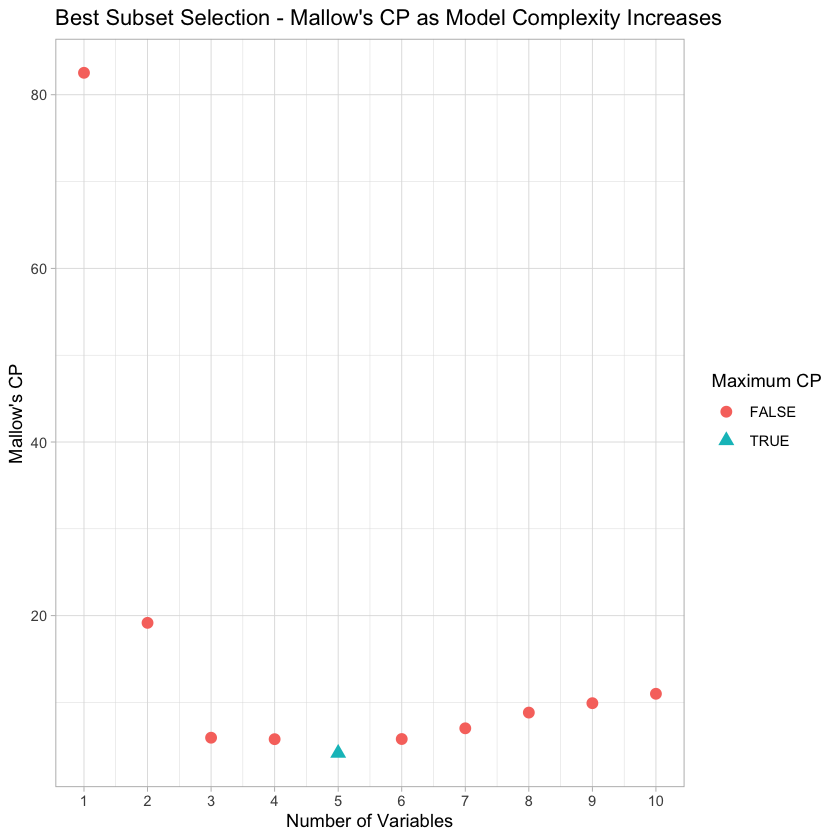

[1] -310.1608


[1] 3

(Intercept)           x          x2          x3 
  2.5914807   1.0777965   0.3283605   0.9633979

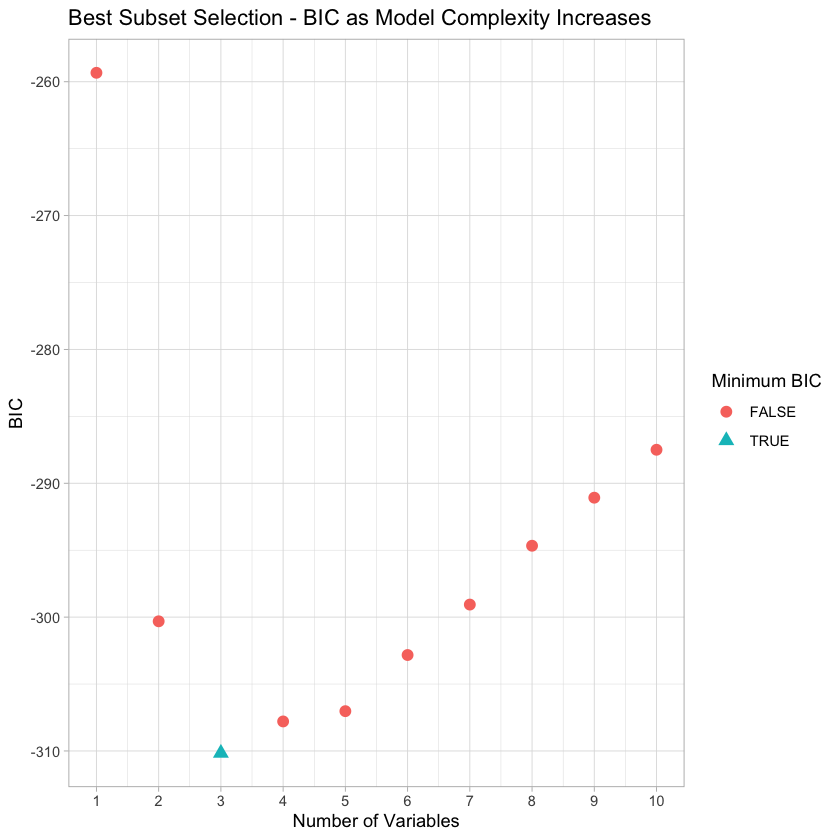

[1] 0.9629228


[1] 5

(Intercept)            x           x3           x4           x8          x10 
 2.587925738  1.242593289  0.861603200  0.268575632 -0.012705778  0.001008373

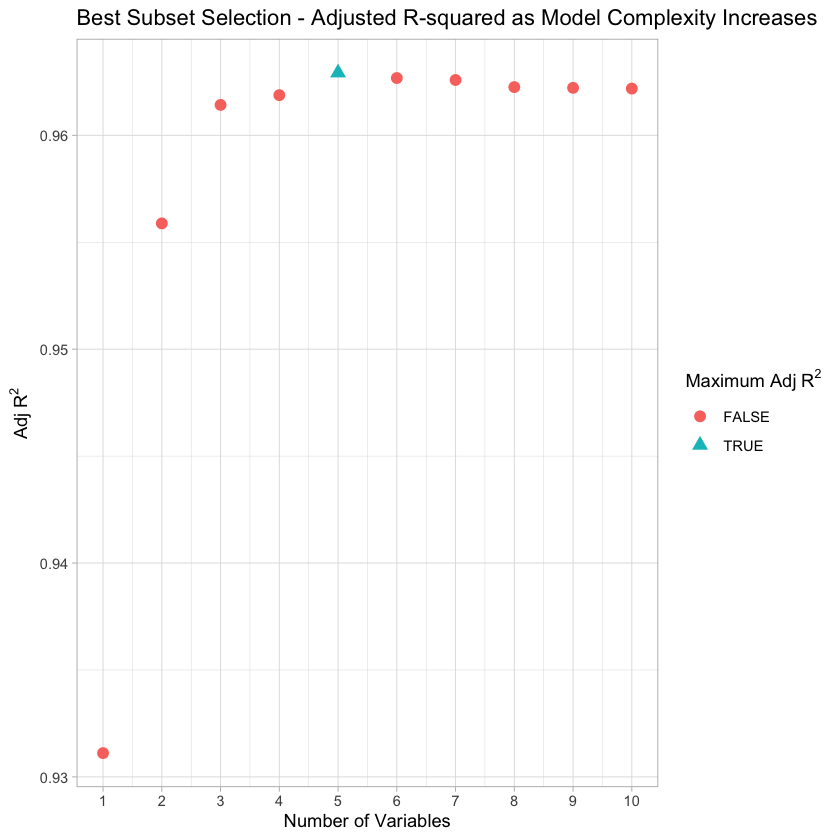

In [9]:
library(ggplot2)

# Make a vector that lists the number of variables in sequence 
numvar = 1:length(reg.summary$rss)

# Starting point for an indicator that marks the best model choice for each metric.
allfalse = rep(FALSE,length(reg.summary$rss))

## Mallow's Cp: 
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df, aes(x=numvar, y=cp, shape=mincp, col=mincp)) +
  geom_point(size=3) + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP",
       title = "Best Subset Selection - Mallow's CP as Model Complexity Increases") +
  theme_light()

print(min(cp))
which.min(cp)
coef(regfit.full, which.min(cp))


# BIC
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC",
       title = "Best Subset Selection - BIC as Model Complexity Increases")

print(min(bic))
which.min(bic)
coef(regfit.full, which.min(bic))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2,
       title = "Best Subset Selection - Adjusted R-squared as Model Complexity Increases")

print(max(adjr2))
which.max(adjr2)
coef(regfit.full, which.max(adjr2))


> The "best" model depends on what measure of fit you decide to consult. 

> For example, a model containing 5 terms is best per the Mallow's C (note: a noticeable pleateau begins around 3 terms); a model containing 3 terms is best per BIC; and a model containing 5 terms is best per adjusted R-squared (again with a pleateau noticed around 3 terms). 

> The coefficient associated with the best model per Mallow's Cp is equal to 4.17; the coefficient associated with the best model per BIC is equal to -310.16; the coefficient associated with the best model per adjusted R-squared is equal to 0.963. 

> The ideal model selected by Mallow's C contains: x (coefficient = 1.24), x^3 (coefficient = 0.86), x^4 (coefficient = 0.27), x^8 (coefficient = -0.01), and x^10 (coefficient = 0.001). 

> The ideal model selected by BIC contains: x (coefficient = 1.08), x^2 (coefficient = 0.33), and x^3 (coefficient = 0.96). 

> The ideal model selected by Adjusted R-squared contains: x (coefficient = 1.24), x^3 (coefficient = 0.86), x^4 (coefficient = 0.27), x^8 (coefficient = -0.01), and x^10 (coefficient = 0.001)

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., df, nvmax = 10, method = c("forward"))
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  "*" " " "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
5  ( 1 )  "*" "*" "*" "*" " " "*" " " " " " " " "
6  ( 1 )  "*" "*" "*" "*" " " "*" " " " " " " "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " " " "*" "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " " " "*" "*"
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" " " "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "

[1] 5.771227


[1] 4

(Intercept)           x          x2          x3          x4 
 2.49864525  1.18467177  0.54051683  0.90213307 -0.04373838

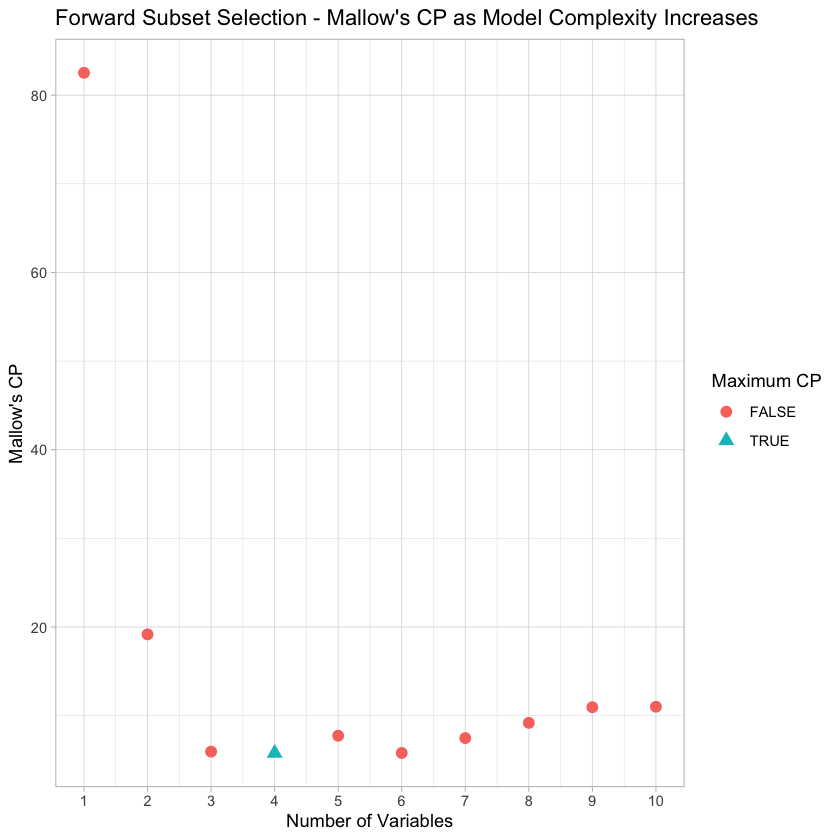

[1] -310.1608


[1] 3

(Intercept)           x          x2          x3 
  2.5914807   1.0777965   0.3283605   0.9633979

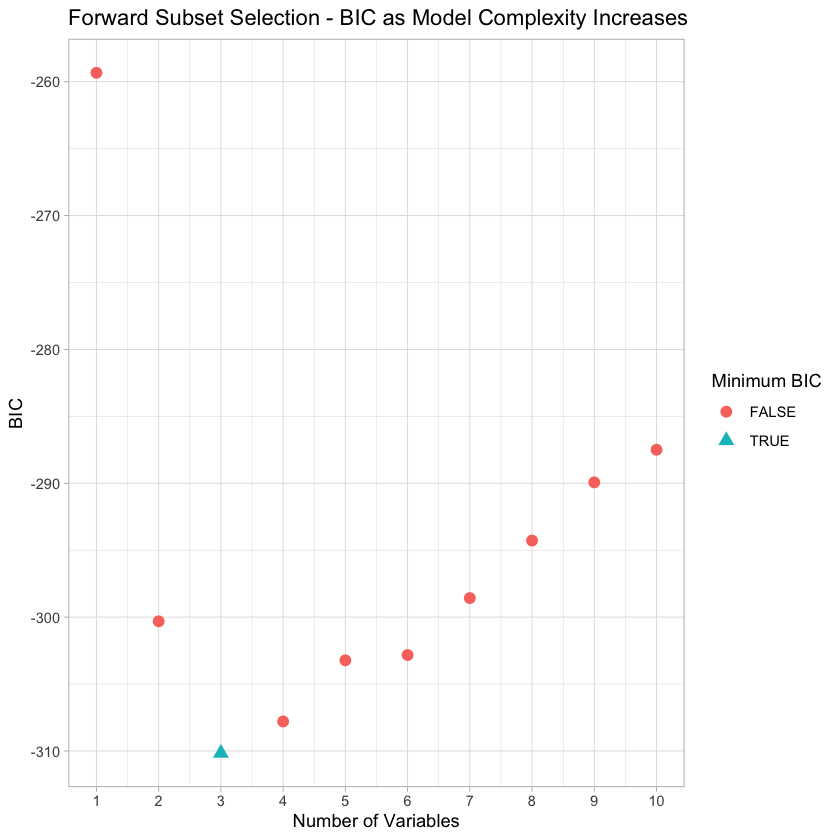

[1] 0.9626775


[1] 6

(Intercept)             x            x2            x3            x4 
 2.6872307477  1.2596185267 -0.5040260430  0.8555094046  0.6700057814 
           x6           x10 
-0.1114841364  0.0004985562

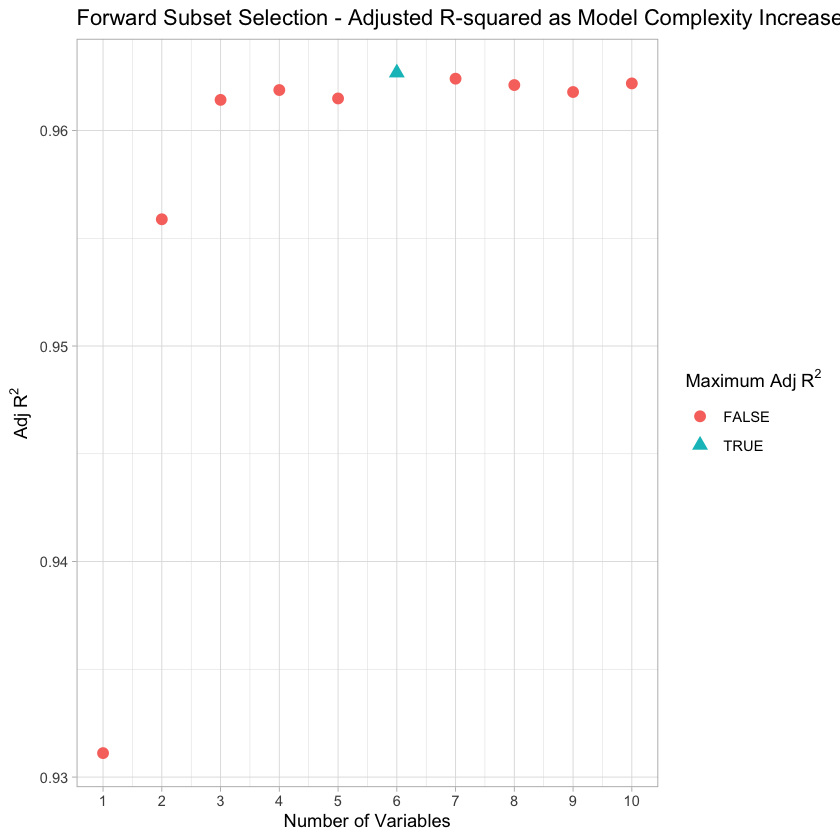

In [15]:
regfit.forward <- regsubsets(y ~ ., df, nvmax = 10, method = c("forward"))
reg.forward.summary <- summary(regfit.forward)
reg.forward.summary


## Mallow's Cp: 
cp.df_forward <- data.frame(numvar = numvar, cp_forward <- reg.forward.summary$cp, 
                            mincp_forward <- allfalse)
cp.df_forward$mincp_forward[which.min(reg.forward.summary$cp)] <- TRUE
ggplot(cp.df_forward, aes(x=numvar, y=cp_forward, shape=mincp_forward, col=mincp_forward)) +
  geom_point(size=3) + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP",
       title = "Forward Subset Selection - Mallow's CP as Model Complexity Increases") +
  theme_light()

print(min(cp_forward))
which.min(cp_forward)
coef(regfit.forward, which.min(cp_forward))

# BIC
bic.df_forward <- data.frame(numvar = numvar,bic_forward <- reg.forward.summary$bic, 
                             minbic_forward <- allfalse)
bic.df_forward$minbic_forward[which.min(reg.forward.summary$bic)] <- TRUE
ggplot(bic.df_forward,aes(x=numvar,y=bic_forward,shape=minbic_forward,col=minbic_forward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC",
       title = "Forward Subset Selection - BIC as Model Complexity Increases")

print(min(bic_forward))
which.min(bic_forward)
coef(regfit.forward, which.min(bic_forward))


#adjr2
adjr2.df_forward <- data.frame(numvar = numvar, adjr2_forward <- reg.forward.summary$adjr2, 
                               maxadjr2_forward <- allfalse)
adjr2.df_forward$maxadjr2_forward[which.max(reg.forward.summary$adjr2)] <- TRUE
ggplot(adjr2.df_forward,aes(x=numvar,y=adjr2_forward,shape=maxadjr2_forward,col=maxadjr2_forward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2,
       title = "Forward Subset Selection - Adjusted R-squared as Model Complexity Increases")
print(max(adjr2_forward))
which.max(adjr2_forward)
coef(regfit.full, which.max(adjr2_forward))


## Description of Findings: 

## --------------------------------------------------------------------------------------

## Mallow's Cp: 
## The ideal model per Mallow's Cp using forward subset selection contains 4 terms. 
## The Mallow's Cp value associated with the ideal 4-term model is equal to 5.77. 
## The terms included in the ideal model are:

    ## x (coefficient = 1.18)
    ## x^2 (coefficient = 0.54)
    ## x^3 (coefficient = 0.90)
    ## x^4 (coefficient = -0.04)

## --------------------------------------------------------------------------------------

# BIC: 
## The ideal model per BIC using forward subset selection contains 3 terms. 
## The Mallow's Cp value associated with the ideal 3-term model is equal to -310.16. 
## The terms included in the ideal model are:

    ## x (coefficient = 1.08)
    ## x^2 (coefficient = 0.33)
    ## x^3 (coefficient = 0.96)

## --------------------------------------------------------------------------------------

## Adjusted R-squared: 
## The ideal model per Adjusted R-squared using forward subset selection contains 5 terms. 
## The Adjusted R-squared value associated with the ideal 6-term model is equal to 0.96. 
## The terms included in the ideal model are:

    ## x (coefficient = 1.24)
    ## x^2 (coefficient = -0.50)
    ## x^3 (coefficient = 0.86)
    ## x^4 (coefficient = 0.27)
    ## x^6 (coefficient = 0.11)
    ## x^10 (coefficient = 0.001)

## --------------------------------------------------------------------------------------



In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., df, nvmax = 10, method = c("backward"))
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" " " "*" " " " " " " " " " "
3  ( 1 )  " " " " "*" " " "*" " " "*" " " " " " "
4  ( 1 )  " " " " "*" " " "*" " " "*" " " "*" " "
5  ( 1 )  " " " " "*" " " "*" " " "*" "*" "*" " "
6  ( 1 )  " " " " "*" " " "*" " " "*" "*" "*" "*"
7  ( 1 )  " " " " "*" " " "*" "*" "*" "*" "*" "*"
8  ( 1 )  " " " " "*" "*" "*" "*" "*" "*" "*" "*"
9  ( 1 )  " " "*" "*" "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*"

[1] 8.877639


[1] 8

(Intercept)          x3          x4          x5          x6          x7 
 2.55395611  4.83952886  0.68554660 -3.21168857 -0.52341798  0.91864692 
         x8          x9         x10 
 0.18520545 -0.08359296 -0.02030526

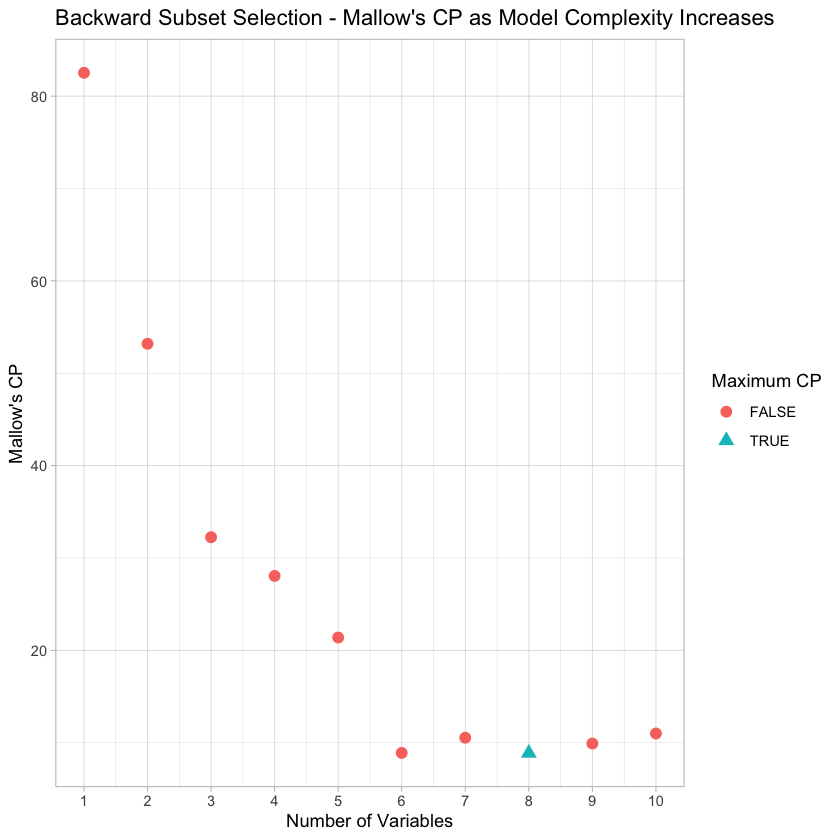

[1] -299.5004


[1] 6

(Intercept)           x3           x5           x7           x8           x9 
 2.673413213  4.019108703 -2.279749033  0.614997155  0.052236789 -0.054382441 
         x10 
-0.009214623

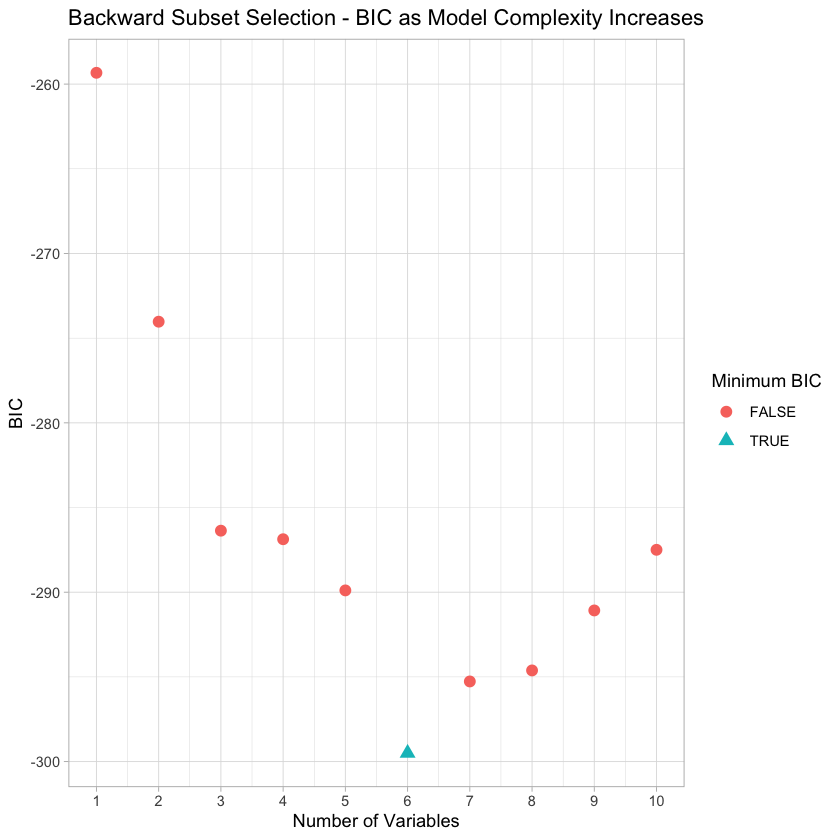

[1] 0.9622358


[1] 8

(Intercept)          x3          x4          x5          x6          x7 
 2.55395611  4.83952886  0.68554660 -3.21168857 -0.52341798  0.91864692 
         x8          x9         x10 
 0.18520545 -0.08359296 -0.02030526

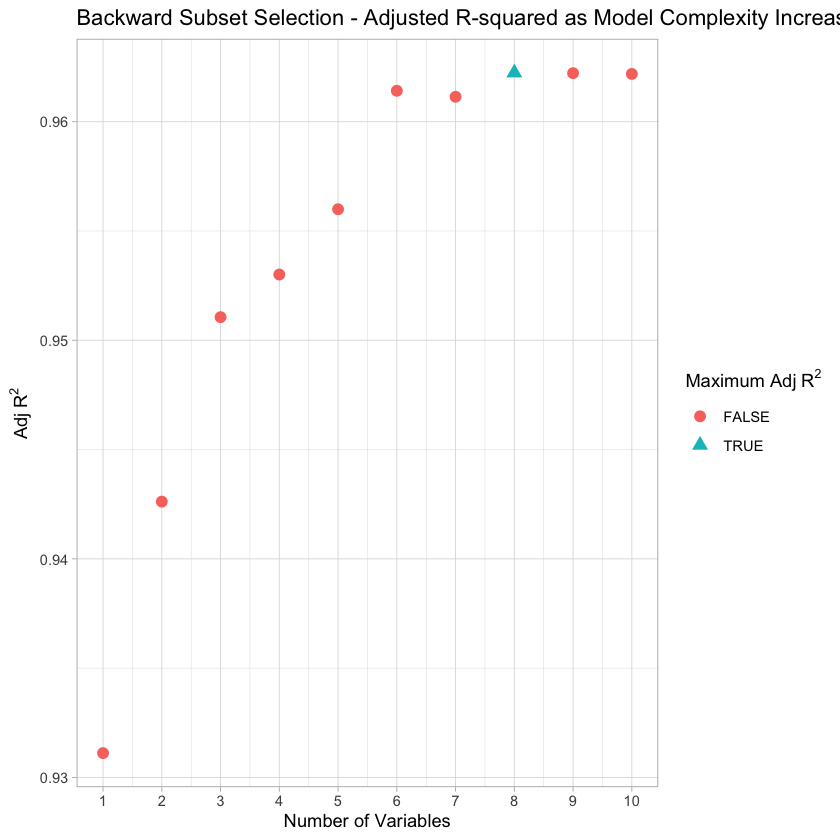

In [16]:
regfit.backward <- regsubsets(y ~ ., df, nvmax = 10, method = c("backward"))
reg.backward.summary <- summary(regfit.backward)
reg.backward.summary



## Mallow's Cp: 
cp.df_backward <- data.frame(numvar = numvar, cp_backward <- reg.backward.summary$cp, 
                            mincp_backward <- allfalse)
cp.df_backward$mincp_backward[which.min(reg.backward.summary$cp)] <- TRUE
ggplot(cp.df_backward, aes(x=numvar, y=cp_backward, shape=mincp_backward, col=mincp_backward)) +
  geom_point(size=3) + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP",
       title = "Backward Subset Selection - Mallow's CP as Model Complexity Increases") +
  theme_light()

print(min(cp_backward))
which.min(cp_backward)
coef(regfit.backward, which.min(cp_backward))


# BIC
bic.df_backward <- data.frame(numvar = numvar,bic_backward <- reg.backward.summary$bic, 
                             minbic_backward <- allfalse)
bic.df_backward$minbic_backward[which.min(reg.backward.summary$bic)] <- TRUE
ggplot(bic.df_backward,aes(x=numvar,y=bic_backward,shape=minbic_backward,col=minbic_backward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC",
       title = "Backward Subset Selection - BIC as Model Complexity Increases")

print(min(bic_backward))
which.min(bic_backward)
coef(regfit.backward, which.min(bic_backward))


#adjr2
adjr2.df_backward <- data.frame(numvar = numvar, adjr2_backward <- reg.backward.summary$adjr2, 
                               maxadjr2_backward <- allfalse)
adjr2.df_backward$maxadjr2_backward[which.max(reg.backward.summary$adjr2)] <- TRUE
ggplot(adjr2.df_backward,aes(x=numvar,y=adjr2_backward,shape=maxadjr2_backward,col=maxadjr2_backward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2,
       title = "Backward Subset Selection - Adjusted R-squared as Model Complexity Increases")

print(max(adjr2_backward))
which.max(adjr2_backward)
coef(regfit.backward, which.max(adjr2_backward))



## Description of Findings: 

## --------------------------------------------------------------------------------------

## Mallow's Cp: 
## The ideal model per Mallow's Cp using backward subset selection contains 8 terms. 
## The Mallow's Cp value associated with the ideal 4-term model is equal to 8.88. 
## The terms included in the ideal model are:


    ## x^3 (coefficient = 4.84)
    ## x^4 (coefficient = 0.69)
    ## x^5 (coefficient = -3.21)
    ## x^6 (coefficient = -0.52)
    ## x^7 (coefficient = 0.92)
    ## x^8 (coefficient = 0.19)
    ## x^9 (coefficient = -0.08)
    ## x^10 (coefficient = -0.02)


## --------------------------------------------------------------------------------------

# BIC: 
## The ideal model per BIC using backward subset selection contains 6 terms. 
## The Mallow's Cp value associated with the ideal 3-term model is equal to -299.50. 
## The terms included in the ideal model are:


    ## x^3 (coefficient = 4.02)
    ## x^5 (coefficient = -2.28)
    ## x^7 (coefficient = 0.61)
    ## x^8 (coefficient = 0.05)
    ## x^9 (coefficient = -0.05)
    ## x^10 (coefficient = -0.009)

## --------------------------------------------------------------------------------------

## Adjusted R-squared: 
## The ideal model per Adjusted R-squared using backward subset selection contains 8 terms. 
## The Adjusted R-squared value associated with the ideal 6-term model is equal to 0.96. 
## The terms included in the ideal model are:


    ## x^3 (coefficient = 4.84)
    ## x^4 (coefficient = 0.69)
    ## x^5 (coefficient = -3.21)
    ## x^6 (coefficient = -0.52)
    ## x^7 (coefficient = 0.92)
    ## x^8 (coefficient = 0.19)
    ## x^9 (coefficient = -0.08)
    ## x^10 (coefficient = 0.001)

## --------------------------------------------------------------------------------------




In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> Regarding the number of terms selected, my results for Mallow's Cp, BIC, and Adjusted R-squared are pretty similar when comparing best subset selection and forward selection. For Mallow's Cp, best subset selection chose a model with 5 terms while forward seleciton chose one with 4 terms; otherwise, BIC (3 tersm) and adjusted r-squared  (5 terms) agreed on the number of terms across these two subset methods. The backwards subset selection oddly identified a lot more terms for the optimal models - for example Mallow's Cp chose 8 terms, BIC chose 6, and adjusted r-squared chose 8. When I change the seed these results vary - throughout doing this homework I was experiencing times when the number of terms across approaches was pretty similar. But this is the seed I planted and stuck with! 

> Regarding which variables were included, this really varied per selection method. This checks out in many ways - when you're using best subset selection, the approach is to find the absolute best model out of all of the combinations of potential models. When using forward or backward subset selection, there's an additive nature. Once the selection choose the best model containing 1 predictor, that 1 predictor must be retained for all subsequential iterations. 

> Out of all of the three methods, the model containing the lowest Mallow's Cp (4.17) was from best subset selection. The model containing the lowest BIC (-310.16) was from both best subset and forward subset selection. The model containing the highest adjusted R-squared (0.963) was found for best subset, forward, and backward subset selection (despite these 3 different outcomes identifying varying number and identity of terms). 

> For best subset selection, a clear plateau was noticed at around 3 terms. For forward selection, a plateau was also noted at around 3 terms. For backward selection, this plateau was noticed more-so around 6 terms. 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [28]:
set.seed(20000)

df2 <- matrix(NA, nrow=1000, ncol=21)
epsilon2<- rnorm(1000)

for (i in 2:21) {
  df2[,i] <- rnorm(1000)
}

beta = runif(20)
beta[sample(20, 5)] = 0
print(beta)

for (i in 1:nrow(df2)) {
  df2[i,1] = (df2[i,2:21] %*% beta) + epsilon2[i]
}

df2 <- data.frame(df2)
colnames(df2) <- append("y", paste0("x", 1:20))

## Create test train split
train <- sample(nrow(df2) * 0.1)
df2_train <- df2[train,]
df2_test <- df2[-train,]


 [1] 0.35200956 0.00000000 0.80482380 0.00000000 0.87784985 0.78130787
 [7] 0.82294115 0.83477894 0.23612128 0.06927834 0.00000000 0.76177290
[13] 0.02803547 0.54080760 0.69853340 0.32109095 0.23537989 0.12280334
[19] 0.00000000 0.00000000


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(y ~ ., df2_train, nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  " " " " " " " " " " "*" " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " " " "*" "*" " " " " " " " " " " " " " " " " " " " " " "
3  ( 1 )  " " " " " " " " "*" "*" " " " " " " " " " " "*" " " " " " 

 (Intercept)           x1           x2           x3           x4           x5 
-0.169801286  0.346732334  0.001912746  0.811056078  0.097708951  0.954588767 
          x6           x7           x8           x9          x10          x11 
 0.700703000  0.764846855  0.751038910  0.317299476  0.089250634  0.173392986 
         x12          x13          x14          x15          x16          x17 
 0.876196731 -0.233945876  0.491397958  0.606052851  0.444580813  0.292819774 
         x18          x19          x20 
 0.058272454  0.193114061 -0.173300758 


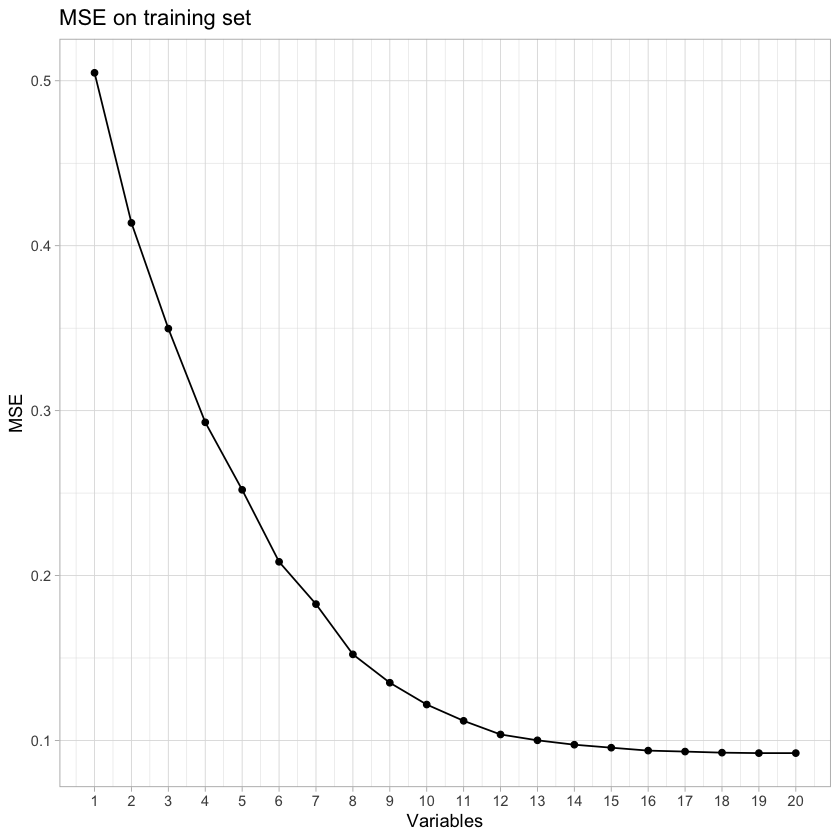

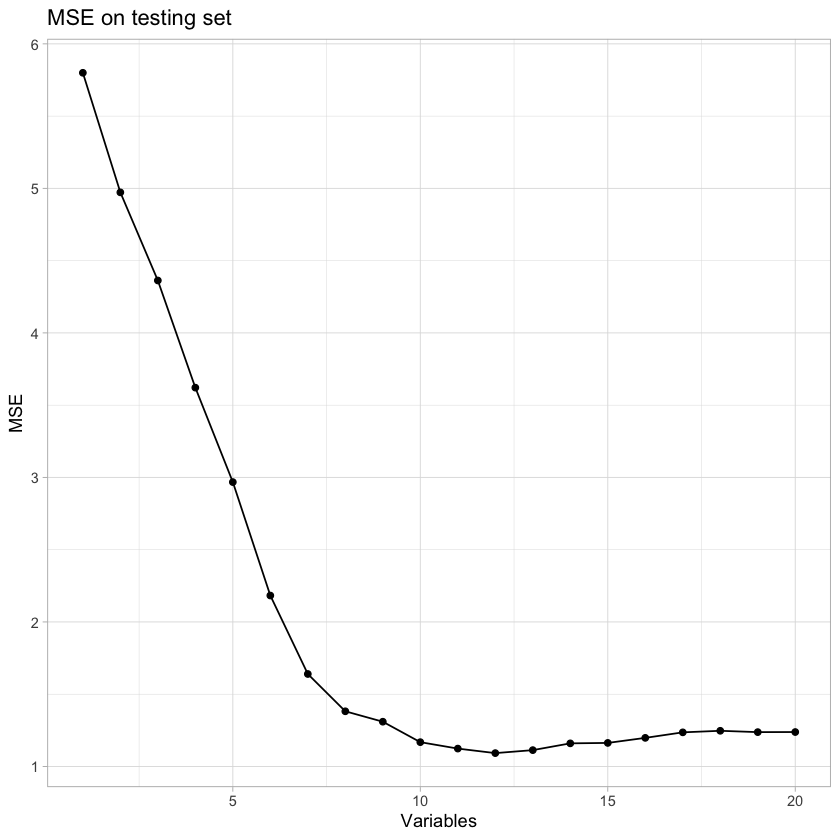

In [29]:
library(tidyverse)

## Perform best subset selection on the training set
regfit.full <- regsubsets(y ~ ., df2_train, nvmax = 20)
bestsubset_summary <- summary(regfit.full)
bestsubset_summary


## Plot associated training set MSE for best model of each size
tibble(MSE = bestsubset_summary$rss/900) %>%
  mutate(id = row_number()) %>%
  ggplot(aes(id, MSE)) + 
  geom_line() + geom_point() + 
  xlab('Variables') + 
  ggtitle('MSE on training set') + 
  scale_x_continuous(breaks = 1:20) + theme_light()


## Plot associated test set MSE for best model of each size
test_errors = rep(NA, 19)
test.matrix <- model.matrix(y ~ ., data = df2_test)

for (i in 1:20) {
  coeffs = coef(regfit.full, id = i)
  pred = test.matrix[,names(coeffs)]%*%coeffs
  test_errors[i] = mean((df2_test$y-pred)^2)
}

print(coeffs)

tibble(MSE = test_errors) %>%
  mutate(id = row_number()) %>%
  ggplot(aes(id, MSE)) + 
  geom_line() + geom_point() + 
  xlab("Variables") + 
  ggtitle("MSE on testing set") + theme_light()


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*


In [30]:
which.min(test_errors)
coef(regfit.full, which.min(test_errors))

[1] 12

(Intercept)          x1          x3          x5          x6          x7 
-0.09304473  0.32877367  0.71844883  0.96485576  0.63392868  0.81719843 
         x8          x9         x12         x14         x15         x16 
 0.72937293  0.34022709  0.81436608  0.46967456  0.62030120  0.46951339 
        x17 
 0.33042453

> First, compared to the true model used to generate the data, the model size where the test MSE takes on the minimum value dropped  certain predictors (x2, x4, x10, x11, x13, x18, x19, x20) while in the process of finding the absolute best combination of predictors that fit the data. This process took the original 20-term model and transformed it to a 12-term model

> Despite dropping variables from the model, the coefficient values randomly generated at the beginning of the problem (part a) compared to the coefficient values generated above using the model where the test MSE takes on the minimum value and drops specific predictors, are very similar (though not identical). For example, the beta coefficient for x1 that I assigned was 0.35 and the coefficient estimated using best subset selection is equal to 0.33. The beta coefficient for x3 that I assigned was 0.80 and the estimated value is 0.72. For x5, the true beta is 0.88 and the estimated beta is 0.96. Etc. etc. etc. 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Monique Tardif, who single handedly got me through this semester and deserves every thing good in the world. 

> Avital Pelakh, who became my friend over Zoom in fall of 2020 and has kindly remained in my life since. 

> Amy Sentis, who responded to my chaotic emails for 6 months and has earned herself a drink. 